In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auction_verification = fetch_ucirepo(id=713)

# data (as pandas dataframes)
X = auction_verification.data.features
y = auction_verification.data.targets

X.head()


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner
0,0,0,2,1,59,1,0
1,0,0,2,1,59,2,0
2,0,0,2,1,59,4,0
3,0,0,2,1,59,6,0
4,0,0,2,1,60,1,0


In [ ]:
y.head()

,verification.result,verification.time
0,False,163.316667
1,False,200.860000
2,False,154.888889
3,False,108.640000
4,True,85.466667


In [5]:
# Извлекаем столбец verification.time из y
verification_time = y['verification.time']

# Удаляем столбец verification.time из y
y = y.drop(columns=['verification.time'])

# Добавляем столбец verification.time в X
X['verification.time'] = verification_time
X.head()

<ipython-input-5-dd8c0697779c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['verification.time'] = verification_time


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
0,0,0,2,1,59,1,0,163.316667
1,0,0,2,1,59,2,0,200.860000
2,0,0,2,1,59,4,0,154.888889
3,0,0,2,1,59,6,0,108.640000
4,0,0,2,1,60,1,0,85.466667


In [ ]:
X.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


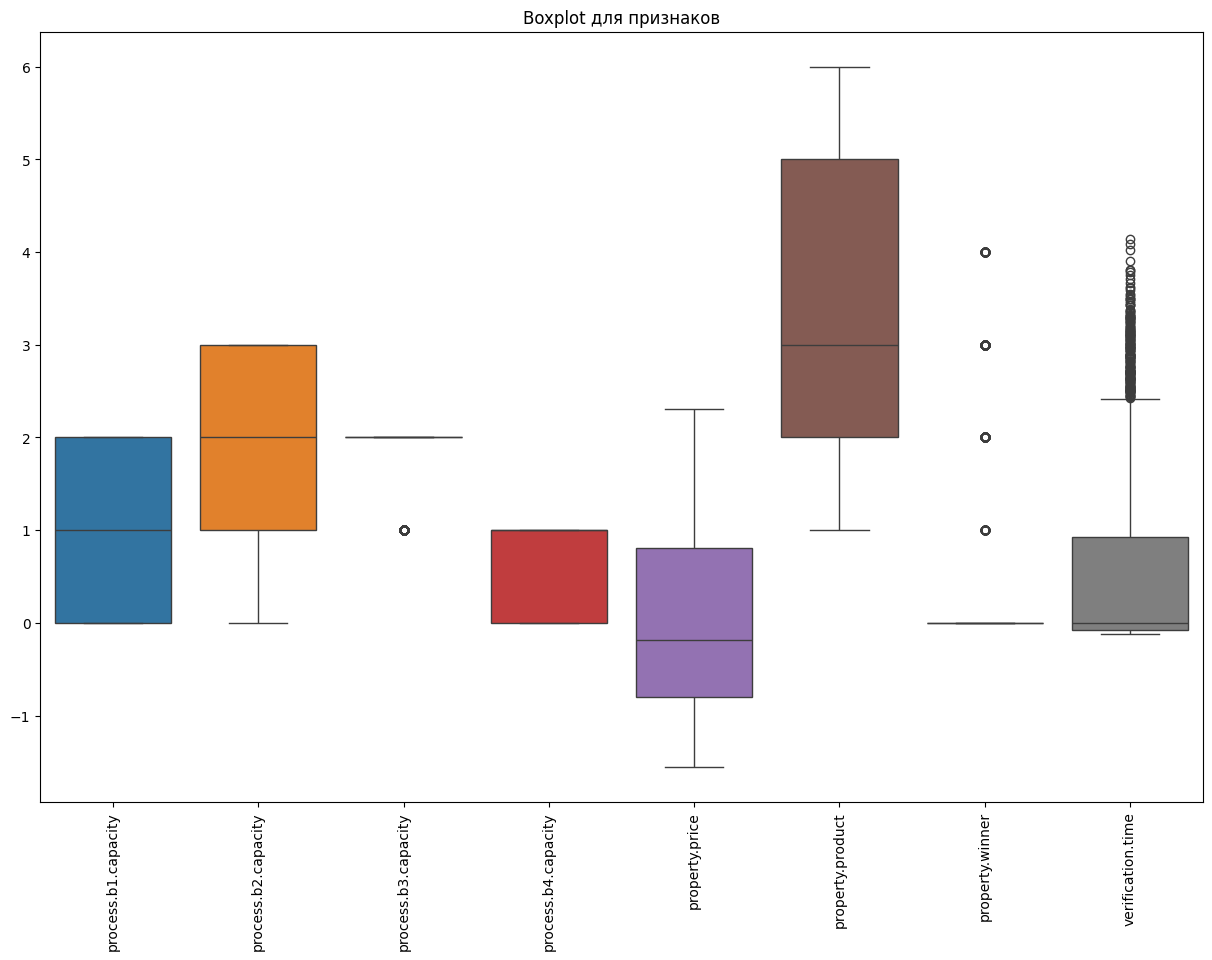

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение boxplot для каждого столбца в X
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()
verification_time_scaled = scaler.fit_transform(verification_time.values.reshape(-1, 1))

# Добавляем масштабированные данные обратно в X
X['verification.time'] = verification_time_scaled

<ipython-input-7-73f5032e863f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['verification.time'] = verification_time_scaled


In [8]:
property_price = X['property.price']
scaler = StandardScaler()
verification_property_price = scaler.fit_transform(property_price.values.reshape(-1, 1))
X['property.price'] = verification_property_price

<ipython-input-8-f3c2eeabe9ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['property.price'] = verification_property_price


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

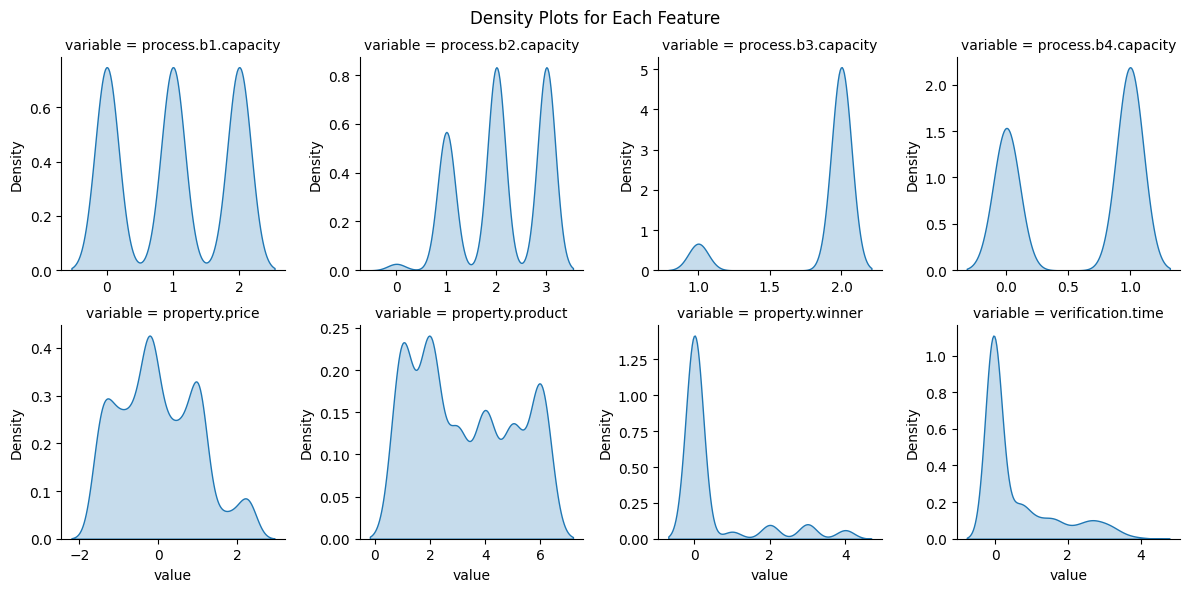

In [9]:
import pandas as pd


data_melted = pd.melt(X)

# Создаем FacetGrid для плотностей признаков
g = sns.FacetGrid(data_melted, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 'value', shade=True)

# Настраиваем и отображаем график
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density Plots for Each Feature')
plt.show()


<Axes: >

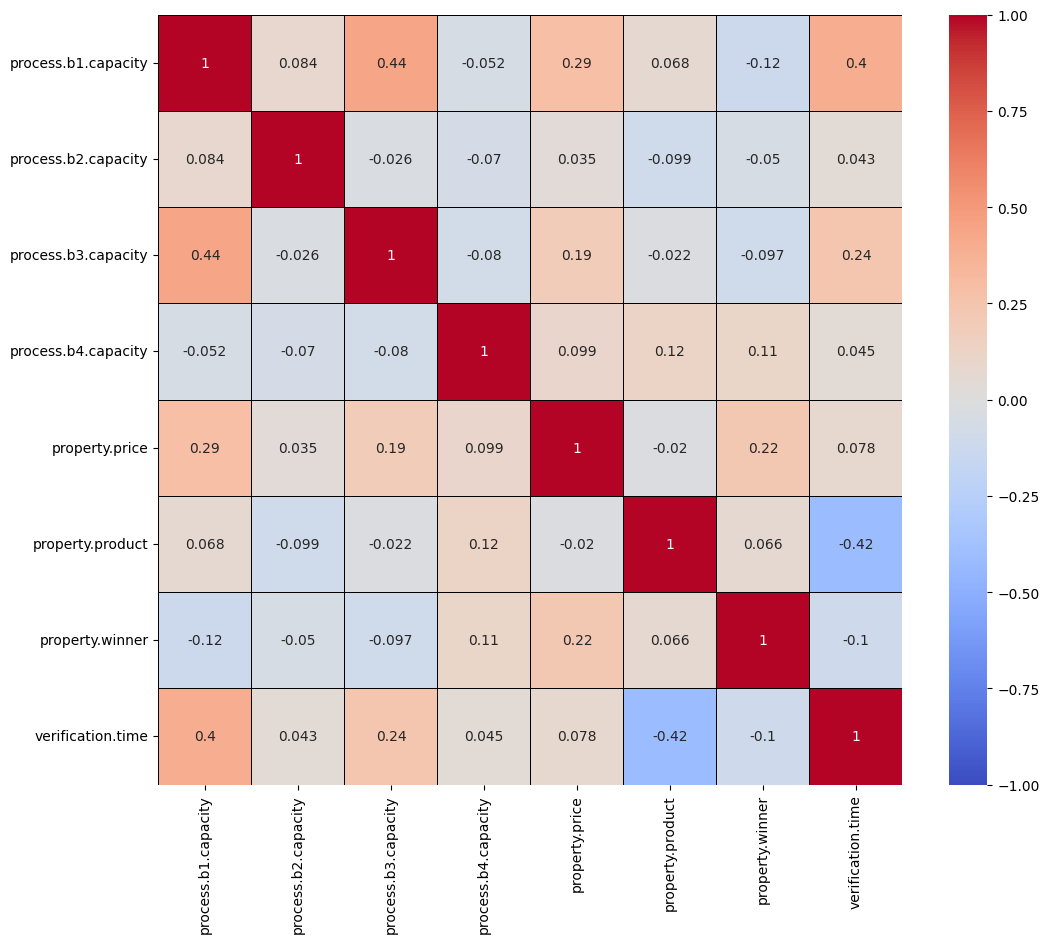

In [11]:
correlation_matrix = X.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')


In [16]:
y.value_counts()

verification.result
False                  1781
True                    262
Name: count, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

# Инициализация моделей
base_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42))
]

# Ансамблевые методы
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000, random_state=42))
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)

ensemble_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('Stacking', stacking_model),
    ('Bagging', bagging_model)
]

# Методы балансировки
extended_balancers = [
    ('NoBalancing', None),
    ('RandomOverSampler', RandomOverSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
    ('ADASYN', ADASYN(random_state=42)),
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42)),
    ('TomekLinks', TomekLinks()),
    ('SMOTEENN', SMOTEENN(random_state=42)),
    ('UnderSampling', RandomUnderSampler(random_state=42))
]

# Внешняя кросс-валидация
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
extended_results = {}
best_models = {}
report = []

# Внешний цикл по методам балансировки и моделям
for balancer_name, balancer in extended_balancers:
    for model_name, model in ensemble_models:
        # Конвейер для балансировки и модели
        if balancer:
            pipeline = Pipeline(steps=[(balancer_name, balancer), (model_name, model)])
        else:
            pipeline = model

        # Внешняя кросс-валидация
        outer_cv_results = []
        for train_idx, val_idx in outer_cv.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

            # Внутренняя кросс-валидация для подбора гиперпараметров
            inner_cv_results = []
            inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            for inner_train_idx, inner_val_idx in inner_cv.split(X_train, y_train):
                X_train_train, X_val = X_train.iloc[inner_train_idx], X_train.iloc[inner_val_idx]
                y_train_train, y_val = y_train.iloc[inner_train_idx], y_train.iloc[inner_val_idx]

                # Тренировка модели
                pipeline.fit(X_train_train, y_train_train)
                y_val_pred = pipeline.predict(X_val)
                val_accuracy = accuracy_score(y_val, y_val_pred)
                inner_cv_results.append(val_accuracy)

            # Средняя точность по внутренней кросс-валидации
            mean_inner_accuracy = np.mean(inner_cv_results)
            outer_cv_results.append(mean_inner_accuracy)

        # Сохранение результатов по внешней кросс-валидации
        extended_results[f"{balancer_name}_{model_name}"] = np.mean(outer_cv_results)
        best_models[f"{balancer_name}_{model_name}"] = pipeline

        # Отчет о лучших моделях на каждом этапе
        sorted_extended_results = sorted(extended_results.items(), key=lambda x: x[1], reverse=True)
        stage_report = {
            "stage": f"{balancer_name}_{model_name}",
            "top_models": sorted_extended_results[:3]
        }
        report.append(stage_report)

        # Тестирование на тестовом наборе данных для трех лучших моделей
        test_results = []
        for best_model_name, _ in sorted_extended_results[:3]:
            best_model = best_models[best_model_name]
            best_model.fit(X_train, y_train)
            y_test_pred = best_model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            test_results.append((best_model_name, test_accuracy))

        stage_report["test_results"] = test_results

# Вывод отчета
for stage in report:
    print(f"Этап: {stage['stage']}")
    print("Топ-3 модели по внешней кросс-валидации:")
    for model_name, score in stage['top_models']:
        print(f"{model_name}: {score:.4f}")
    print("Результаты на тестовом наборе:")
    for model_name, test_accuracy in stage['test_results']:
        print(f"{model_name}: {test_accuracy:.4f}")
    print()


<ipython-input-20-33bdcf6f3573>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pipeline.fit(X_train_train, y_train_train)
<ipython-input-20-33bdcf6f3573>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pipeline.fit(X_train_train, y_train_train)
<ipython-input-20-33bdcf6f3573>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pipeline.fit(X_train_train, y_train_train)
<ipython-input-20-33bdcf6f3573>:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pipeline.fit(X_train_train, y_train_train)
<ipython-input-20-33bdcf6f3573>:74: DataConversionWarnin

Этап: NoBalancing_RandomForest
Топ-3 модели по внешней кросс-валидации:
NoBalancing_RandomForest: 0.9949
Результаты на тестовом наборе:
NoBalancing_RandomForest: 0.9975

Этап: NoBalancing_AdaBoost
Топ-3 модели по внешней кросс-валидации:
NoBalancing_AdaBoost: 0.9953
NoBalancing_RandomForest: 0.9949
Результаты на тестовом наборе:
NoBalancing_AdaBoost: 0.9902
NoBalancing_RandomForest: 0.9975

Этап: NoBalancing_GradientBoosting
Топ-3 модели по внешней кросс-валидации:
NoBalancing_AdaBoost: 0.9953
NoBalancing_GradientBoosting: 0.9950
NoBalancing_RandomForest: 0.9949
Результаты на тестовом наборе:
NoBalancing_AdaBoost: 0.9902
NoBalancing_GradientBoosting: 0.9951
NoBalancing_RandomForest: 0.9975

Этап: NoBalancing_Stacking
Топ-3 модели по внешней кросс-валидации:
NoBalancing_Stacking: 0.9953
NoBalancing_AdaBoost: 0.9953
NoBalancing_GradientBoosting: 0.9950
Результаты на тестовом наборе:
NoBalancing_Stacking: 0.9975
NoBalancing_AdaBoost: 0.9902
NoBalancing_GradientBoosting: 0.9951

Этап: NoBa